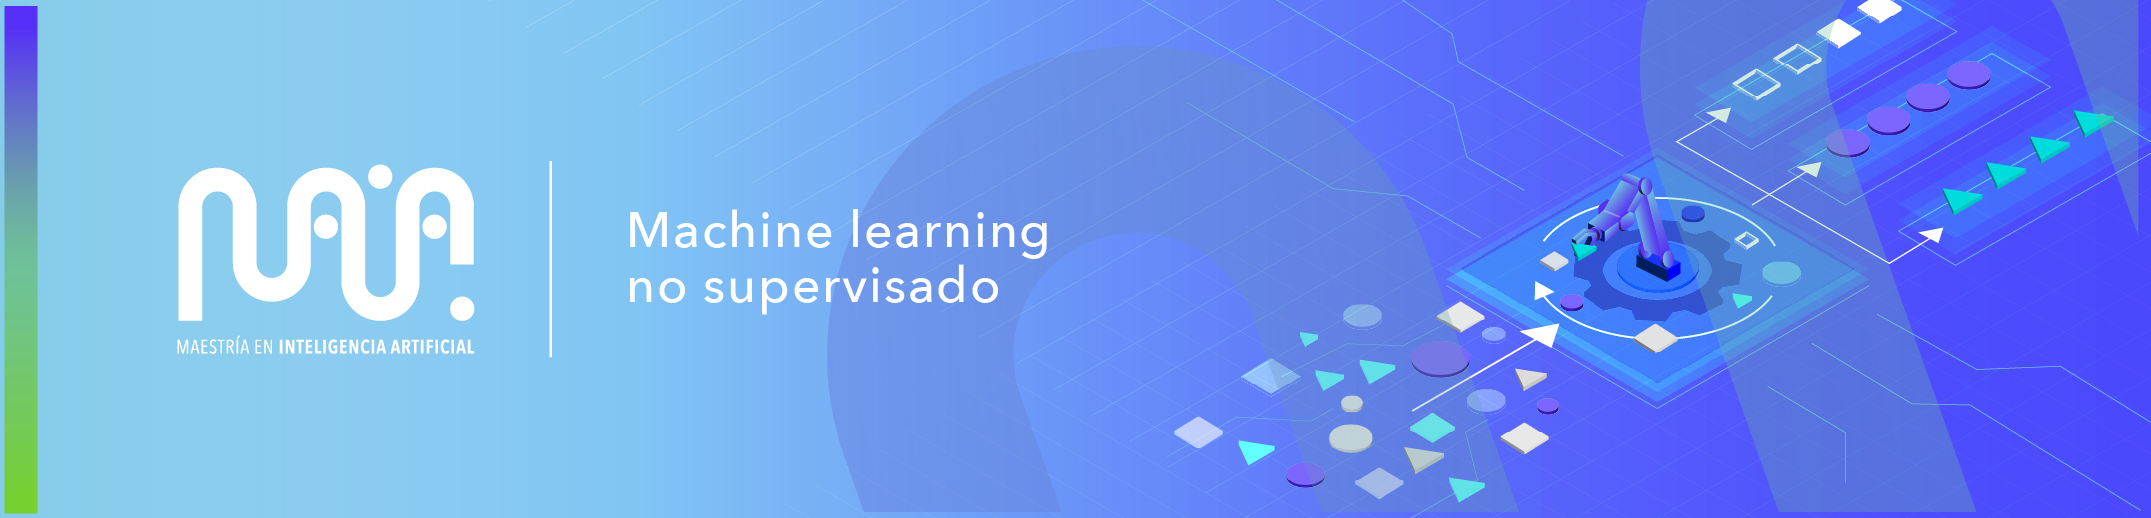

# Procesamiento de textos

En este tutorial aprenderás cómo realizar el procesamiento de un conjunto de datos de texto, con el objetivo de utilizarlo en un problema de clasificación. En ese sentido, utilizarás la librería `nltk` para aplicar los pasos más comunes del procesamiento de textos, generando una representación de bolsa de palabras. Adicionalmente, verás cómo resumir el procesamiento de textos en un solo objeto que puede ser utilizado dentro de un pipeline:

1. [Importar las librerías necesarias.](#1.-Importación-de-librerías-requeridas)
2. [Cargar un conjunto de datos de texto.](#2.-Carga-de-datos)
3. [Procesar los textos.](#3.-Procesamiento-de-texto)
4. [Definir un objeto de procesamiento.](#4.-Definición-de-un-objeto-de-procesamiento)

---
 
    
<font size="3">**Contexto**  
<font size="2"> El análisis de sentimientos es una técnica del procesamiento del lenguaje natural que se emplea con el fin de discernir la actitud emocional o subjetiva manifestada en un texto, ya sea en forma de opiniones, comentarios, reseñas, tuits, entre otros. Su propósito principal es categorizar la polaridad emocional de este, determinando si el contenido refleja valoraciones positivas, negativas o neutras. Esta técnica se presenta como una herramienta valiosa para comprender las emociones expresadas en el lenguaje humano, brindando a organizaciones información crucial para la toma de decisiones, la mejora de productos y servicios, así como la comprensión de la opinión pública. Una aspecto clave en este contexto es la transformación de los textos a un formato vectorial. Para ilustrar este camino utilizaremos el conjunto de textos de [análisis de sentimientos de tweets](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis). 

## 1. Importación de librerías requeridas

Importaremos las librerías `pandas`, `numpy`, `nltk` y `scikit-learn`, así como la librería `wordcloud` para generar una nube de palabras. En particular, usaremos las siguientes clases y funciones para realizar el procesamiento:

* `word_tokenize`: función para separar un texto en una lista de tokens.
* `RegexpTokenizer()`: clase para separar un texto en tokens, utilizando expresiones regulares.
* `stopwords`: lista de palabras vacías.
* `PorterStemmer()`: clase para realizar stemming mediante el método de Porter.
* `WordCloud()`: clase para generar una nube de palabras.
* `CountVectorizer`: clase para obtener una representación de bolsa de palabras.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

## 2. Carga de datos

Realizaremos la carga de datos usando la función de Pandas `read_csv()`, especificando la ruta y el separador del archivo. Incluiremos el parámetro `names` para especificar el nombre de las columnas:

In [5]:
columns = ['ID','User','Label','Text']
data = pd.read_csv('data/twitter_training.csv', sep=',', names=columns)
data

ID         User     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

Iniciaremos con la limpieza de datos, eliminando datos nulos y duplicados:

In [6]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.shape

(71656, 4)

## 3. Procesamiento de texto

Aunque tenemos información sobre el usuario y la etiqueta, nos enfocaremos en la columna `Text` y realizaremos el procesamiento.

### Tokenización

Empezaremos con la separación del texto en una lista de tokens. La manera más sencilla de hacerlo es mediante la función `word_tokenize()`:

In [16]:
tokenized = data["Text"].apply(lambda x: word_tokenize(x))
tokenized

0        [im, getting, on, borderlands, and, i, will, m...
1        [I, am, coming, to, the, borders, and, I, will...
2        [im, getting, on, borderlands, and, i, will, k...
3        [im, coming, on, borderlands, and, i, will, mu...
4        [im, getting, on, borderlands, 2, and, i, will...
                               ...                        
74677    [Just, realized, that, the, Windows, partition...
74678    [Just, realized, that, my, Mac, window, partit...
74679    [Just, realized, the, windows, partition, of, ...
74680    [Just, realized, between, the, windows, partit...
74681    [Just, like, the, windows, partition, of, my, ...
Name: Text, Length: 71656, dtype: object

Veremos una de las listas resultantes. Como puedes observar, se conservan los signos de puntuación:

In [17]:
tokenized.iloc[4100]

['Beautiful',
 'graphics',
 '-',
 'I',
 'loved',
 'the',
 'first',
 'Black',
 'Ops',
 '.']

Puedes utilizar la clase `RegexpTokenizer()` para realizar una tokenización personalizada. Por ejemplo, definiendo la expresión regular `\w+`, indicaremos que solo queremos conservar las palabras:

In [18]:
tokenizer = RegexpTokenizer(r'\w+')
tokenized_no_punct = data["Text"].apply(lambda x: tokenizer.tokenize(x))
tokenized_no_punct

0        [im, getting, on, borderlands, and, i, will, m...
1        [I, am, coming, to, the, borders, and, I, will...
2        [im, getting, on, borderlands, and, i, will, k...
3        [im, coming, on, borderlands, and, i, will, mu...
4        [im, getting, on, borderlands, 2, and, i, will...
                               ...                        
74677    [Just, realized, that, the, Windows, partition...
74678    [Just, realized, that, my, Mac, window, partit...
74679    [Just, realized, the, windows, partition, of, ...
74680    [Just, realized, between, the, windows, partit...
74681    [Just, like, the, windows, partition, of, my, ...
Name: Text, Length: 71656, dtype: object

Si accedemos al mismo índice, veremos que el resultado ha cambiado:

In [19]:
tokenized_no_punct.iloc[4100]

['Beautiful', 'graphics', 'I', 'loved', 'the', 'first', 'Black', 'Ops']

### Eliminación de palabras vacías

Definiremos la lista de palabras vacías `nltk_stopwords`, filtrando cada lista de tokens para conservar solamente las palabras relevantes:

In [20]:
nltk_stopwords = stopwords.words("english")
no_stopwords = tokenized_no_punct.apply(lambda x: [token for token in x if token not in nltk_stopwords])
no_stopwords

0                       [im, getting, borderlands, murder]
1                            [I, coming, borders, I, kill]
2                         [im, getting, borderlands, kill]
3                        [im, coming, borderlands, murder]
4                    [im, getting, borderlands, 2, murder]
                               ...                        
74677    [Just, realized, Windows, partition, Mac, like...
74678    [Just, realized, Mac, window, partition, 6, ye...
74679    [Just, realized, windows, partition, Mac, 6, y...
74680    [Just, realized, windows, partition, Mac, like...
74681    [Just, like, windows, partition, Mac, like, 6,...
Name: Text, Length: 71656, dtype: object

Si consultamos el mismo texto, veremos que la palabra 'the' ha sido eliminada:

In [21]:
no_stopwords.iloc[4100]

['Beautiful', 'graphics', 'I', 'loved', 'first', 'Black', 'Ops']

Al eliminar las palabras vacías, podemos generar una nube de palabras para ver su frecuencia en el conjunto. Primero vamos a generar un `string` con todos los textos concatenados:

In [22]:
wc_text = ' '.join(word for text in no_stopwords for word in text)

Posteriormente, vamos a usar la clase `WordCloud()` para generar una imagen:

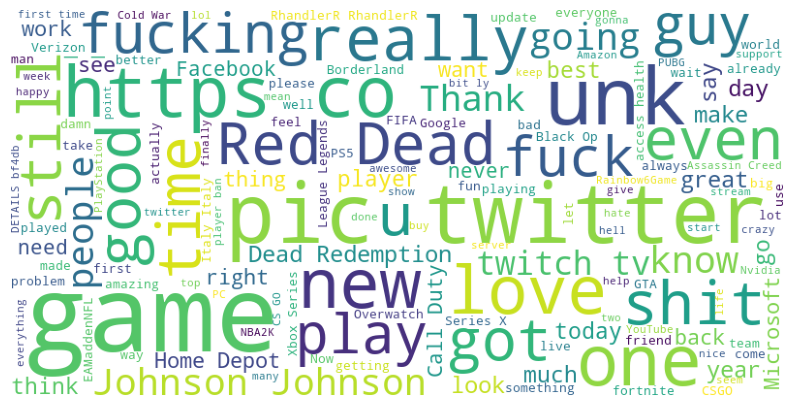

In [23]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color ='white',
    min_font_size=10,
    max_font_size=110
).generate(wc_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Stemming / Lematización

El siguiente paso es la reducción de cada token a su forma más general, mediante un proceso de stemming o lematización. En este caso utilizaremos la clase `PorterStemmer()`:

In [24]:
stemmer = PorterStemmer()
stemmed = no_stopwords.apply(lambda x: [stemmer.stem(token) for token in x])
stemmed

0                            [im, get, borderland, murder]
1                               [i, come, border, i, kill]
2                              [im, get, borderland, kill]
3                           [im, come, borderland, murder]
4                         [im, get, borderland, 2, murder]
                               ...                        
74677    [just, realiz, window, partit, mac, like, 6, y...
74678    [just, realiz, mac, window, partit, 6, year, b...
74679    [just, realiz, window, partit, mac, 6, year, b...
74680    [just, realiz, window, partit, mac, like, 6, y...
74681    [just, like, window, partit, mac, like, 6, yea...
Name: Text, Length: 71656, dtype: object

Puedes visualizar el resultado sobre el texto de ejemplo:

In [25]:
stemmed.iloc[4100]

['beauti', 'graphic', 'i', 'love', 'first', 'black', 'op']

Finalmente, volveremos a construir una cadena de texto para que pueda ser procesada por la clase `CountVectorizer()`:

In [26]:
processed = stemmed.apply(lambda x: ' '.join(x))
processed

0                                 im get borderland murder
1                                     i come border i kill
2                                   im get borderland kill
3                                im come borderland murder
4                               im get borderland 2 murder
                               ...                        
74677    just realiz window partit mac like 6 year behi...
74678    just realiz mac window partit 6 year behind nv...
74679    just realiz window partit mac 6 year behind nv...
74680    just realiz window partit mac like 6 year behi...
74681    just like window partit mac like 6 year behind...
Name: Text, Length: 71656, dtype: object

### Representación de Bolsa de Palabras

Con el conjunto de textos procesado, podemos definir un objeto de la clase `CountVectorizer()` y aplicar el método `fit_transform()` para obtener una representación de bolsa de palabras. Esta representación se guardará como una matriz dispersa:

In [27]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(processed)
x_train

<71656x24288 sparse matrix of type '<class 'numpy.int64'>'
	with 817376 stored elements in Compressed Sparse Row format>

## 4. Definición de una función (objeto) de procesamiento

Podemos resumir todo el procesamiento en una función, que ejecuta cada paso a nivel de texto:

In [28]:
def text_preprocess(text):
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = PorterStemmer()
    
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

Si utilizamos el parámetro `preprocessor` de la clase `CountVectorizer()`, podremos pasar por parámetro la columna de texto original al método `fit_transform()`. El resultado es el mismo que en la sección anterior:

In [29]:
vectorizer = CountVectorizer(preprocessor=text_preprocess)
x_train = vectorizer.fit_transform(data["Text"])
x_train

<71656x24288 sparse matrix of type '<class 'numpy.int64'>'
	with 817376 stored elements in Compressed Sparse Row format>

## Cierre

En este tutorial hemos utilizado diferentes clases y funciones de `nltk` para realizar el procesamiento típico de textos para su uso en aplicaciones de machine learning. Adicionalmente, utilizamos la clase `CountVectorizer` de `scikit-learn` para obtener una representación de bolsa de palabras, e integramos todo el procesamiento en un solo objeto.

<font size="3">**Hands-on**  


* Para este conjunto realizamos un proceso de stemming, que elimina sufijos y prefijos pero puede no retornar palabras reales. ¿Qué deberías hacer para reemplazar este proceso por una lematización?
* Igualmente, utilizamos el texto procesado para generar una representación de bolsa de palabras. ¿Qué otras representaciones vectoriales puedes obtener para un conjunto de texto?

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Noviembre 16, 2023*  
*Universidad de los Andes*   